In [4]:
# Importing the necessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


In [5]:
# Load the data
Start_up =pd.read_csv('/content/drive/MyDrive/assignments-BE/Linear Regression/50_Startups.csv.xls')


In [6]:
# Read the data
Start_up.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [7]:
# Getting to know the data
Start_up.shape
Start_up.info()# there are 4 float dtypes columns and one object
Start_up.describe()# mean and median are almost same for all the numerical columns



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


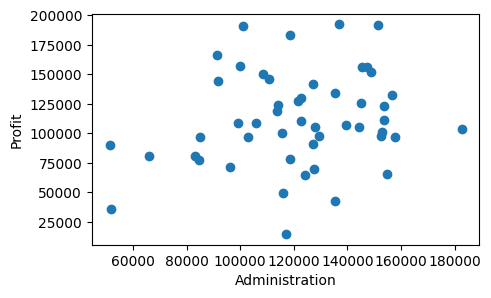

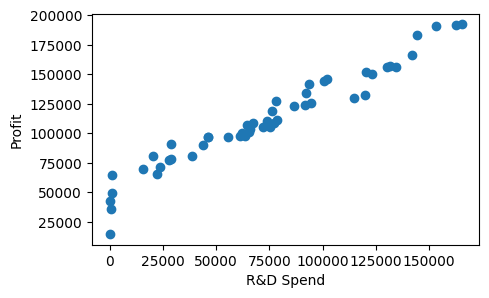

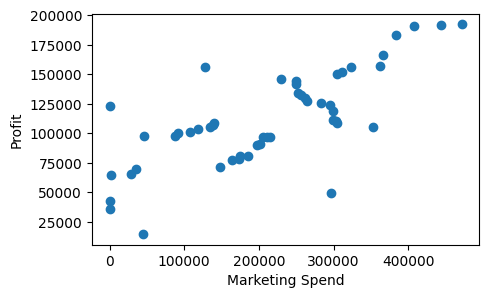

In [8]:
# Data Visualization
for i in ['Administration','R&D Spend','Marketing Spend']:
  plt.figure(figsize=(5,3))
  plt.scatter(Start_up[i],Start_up['Profit'])
  plt.xlabel(i)
  plt.ylabel('Profit')
  plt.show()



In [ ]:
# from the above we can conclude that, all numerical columns are linearly related to profit except for column Administration,so we proceed with linear regression after checking if any correlation exists with categorical columns


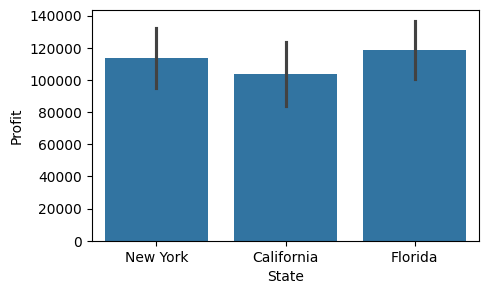

In [9]:
# Bar chart
plt.figure(figsize=(5,3))
sns.barplot(x='State',y='Profit',data=Start_up)
plt.show()

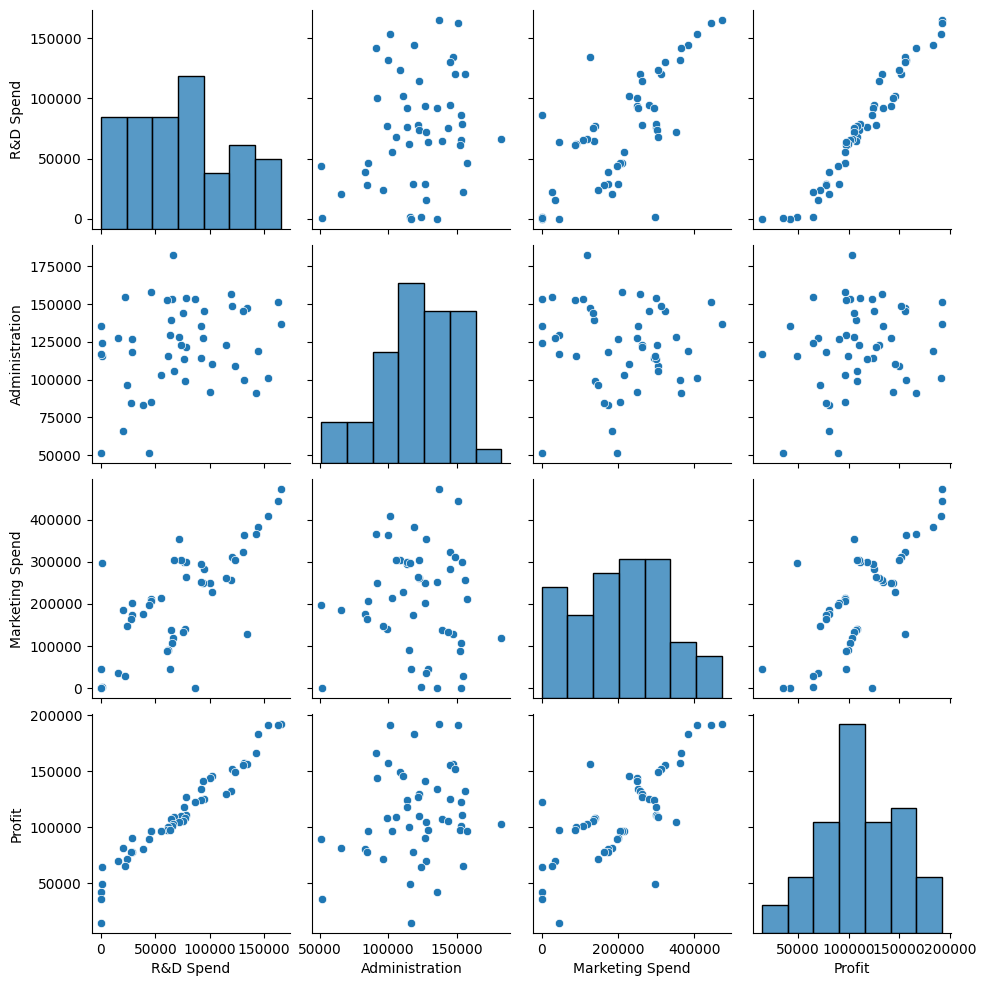

In [10]:
# pairplot
sns.pairplot(Start_up)
plt.show()

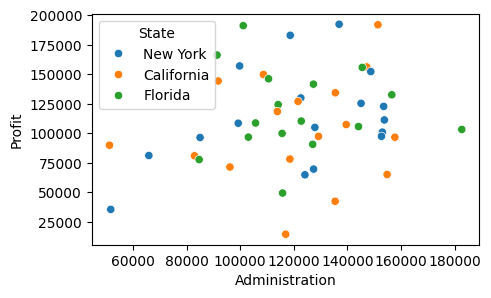

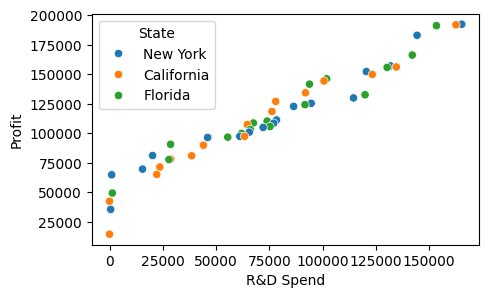

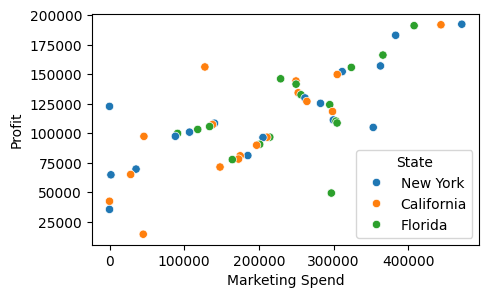

In [11]:
for i in ['Administration','R&D Spend','Marketing Spend']:
  plt.figure(figsize=(5,3))
  sns.scatterplot(x=i,y='Profit',data=Start_up,hue='State')
  plt.xlabel(i)
  plt.ylabel('Profit')
  plt.show()



In [25]:
# Here we observe that irrespective of state R&D,marketing spend and ptofit are linearly related,so we go with multiple lnear   regression


In [12]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score


In [13]:
# Separating the input and output
X=Start_up[['R&D Spend','Marketing Spend']]
y=Start_up['Profit']
# Performing train test split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=5)


In [14]:
# Loading the model
model=LinearRegression()
# Fitting the model
model.fit(X_train,y_train)


LinearRegression()

In [15]:
# Predicting the values
y_pred_train=model.predict(X_train)
y_pred_test=model.predict(X_test)
# Evaluating the model
print('MSE train:',mean_squared_error(y_train,y_pred_train))
print('MSE test:',mean_squared_error(y_test,y_pred_test))
print('R2 train:',r2_score(y_train,y_pred_train))
print('R2 test:',r2_score(y_test,y_pred_test))

MSE train: 87583077.92314252
MSE test: 50039455.243243404
R2 train: 0.9436198878593198
R2 test: 0.9683604384024198
